In [14]:
options(repr.plot.width=3.5, repr.plot.height=3.5)

# Lab 4 Pre-Reading Techniques
• Draw samples from certain distributions in R.\
• Visualize distribution of minimum or maximum of independent random variables by simulations.\
• Calculate probabilities using R and compare with results calculated by hand.

## 1.1: The Maximum

Let's start this lesson with an example!

Suppose a system consists of two components, A and B, connected in parallel (see Figure
1). 

The lifetime of components A and B are independent exponential random variables with
mean 40 and 50 respectively (in hours).

1. What is the density function of the lifetime of the system? Does it also follow an exponential distribution?
2. What is the probability that the system will fail before 45 hours?

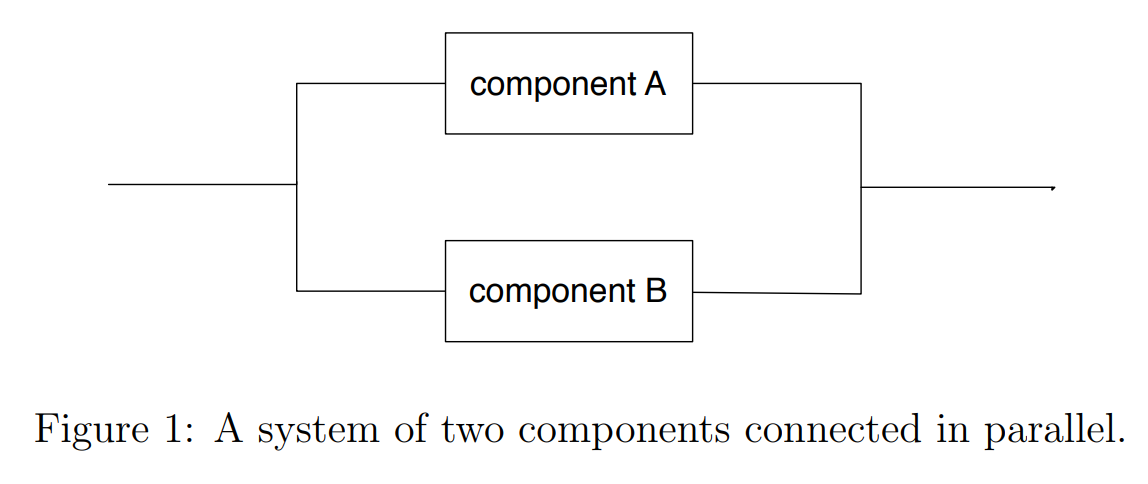

### Answer 1 (By Hand)
Let $X_A$ be the random variable that represents the life time of component $A$, and let $X_B$ be the thing for component $B$. $Y$ is the lifetime of the overall system. Now if component $A$ fails, $B$ picks up the slack, and vice versa. So the only way this system fails is if both of these guys fail! So we are looking for which one will live the maximum amount of time. In other words: 

$$
Y=max(X_A, X_B)
$$


From the question: 

$$
A: \mu = 40, \mu = \frac{1}{\lambda},~~~\therefore \lambda = \frac{1}{40}\\
B: \mu = 50, \mu = \frac{1}{\lambda},~~~\therefore \lambda = \frac{1}{50}
$$

Now that we have the lambda, we can start establishing the PDF which will follow: 

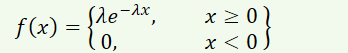

So we want $F(y)$ or the CDF of $Y$. Well that is the same thing as: 

$$
F(y)=P(Y\leq y)\\
=P(X_A \leq y \text{ and } X_B \leq y)\\
=P(X_A\leq y) * P(X_B\leq y)~~~\text{since they are independent}\\
=(1-e^{\frac{-y}{40}}) * (1-e^{\frac{-y}{50}})\\
=1-e^{-y/40} - e^{-y/50} + e^{-9y/200}\\
\text{Now we can take the derivaitve of this whole mess and reveal that the PDF is:}\\
f(y)=F'(y)=\frac{1}{40}e^{\frac{-y}{40}}+\frac{1}{50}e^{\frac{-y}{50}}-\frac{9}{200}e^{\frac{-9y}{200}}
$$

Now that we have the PDF, we can see clearly it doesn't follow an exponential distribution. Those types of distributions are supposed to look like:

$$\lambda e^{-\lambda x}$$

### Answer 2
To see the chances of this thing living past 45, we have to use that new PDF we just made. And happily, we simply plug in 45 to the formula: 

$$
f(45)=\frac{1}{40}e^{\frac{-45}{40}}+\frac{1}{50}e^{\frac{-45}{50}}-\frac{9}{200}e^{\frac{-9(45)}{200}}=0.4
$$

So a 40% chance of living!

## The minimum
(i) What are the pdf and distribution of Y now?\
(ii) What is the probability that the system will fail before 45 hours?

Now you have a scenario where if 1 component fails, the whole thing fails:
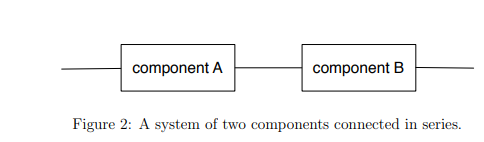

$$Y = min(X_A and X_B)$$

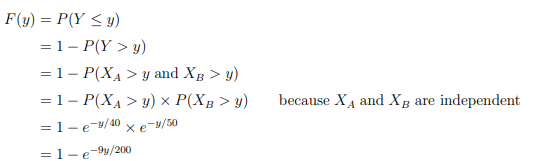

### Answer 1
Now we have the CDF. We differentiate to get the PDF and we end up with: 

$$
f(y)=F'(y)=\frac{9}{200}e^{\frac{-9}{200}}
$$

And this boy DOES follow an exponential distribution!

### Answer 2
Plug it in!
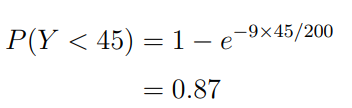


# Doing this with R

Let's run this on a sample of 10000 subjects

In [55]:
n = 10000
Xa = rexp(n, rate = 1/40) #1000 samples that fit an exponential distribution
Xb = rexp(n, rate = 1/50) #Same for Xb

X = cbind(Xa,Xb) #Making a matrix of these 2 things

head(X)

Xa,Xb
26.119166,35.23514
36.005731,225.69455
2.135180,50.79097
9.556584,49.76180
78.341963,34.35494
33.605158,16.26435


What we need is the maximum value of each row. For example, in the first row, the max would be 45, then 163 for the second row, 3rd would be 126, etc. 

In [56]:
Y1 = apply(X, 1, max)
head(Y1)

[1]  35.23514 225.69455  50.79097  49.76180  78.34196  33.60516

This simulates the maximum life a component would have. So n the first row, $B$ died first, making $A$ the maximum lifetime. Let's draw a histogram of the maximum lifetimes, and add a curve to match that histogram:

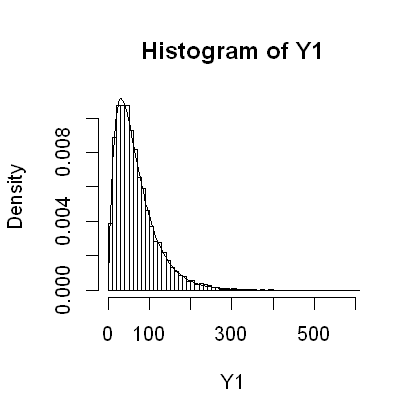

In [57]:
#The Histogram
hist(Y1, prob=TRUE, breaks = 50)

#the function that describes what we predict will happen
f1 = function(y){1/40*exp(-y/40)+1/50*exp(-y/50)-9/200*exp(-9*y/200)}

#Using that function to draw the curve
curve(f1, from = 0, to = 350, add=T)

Surprisingly, the curve fits Excellently! We were REALLY right! Now let's get the proability that this will live past 45 hours:

In [58]:
p1 <- sum(Y1 < 45)/n # return something close to 0.4
p1

[1] 0.3965

And if we wanted to do the minimum instead:

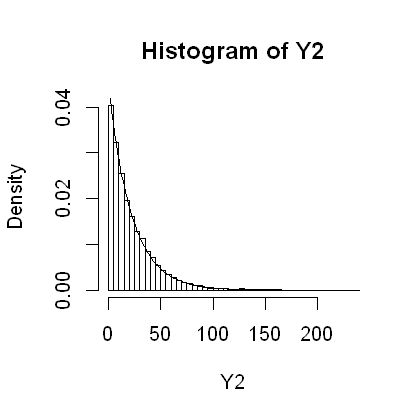

In [61]:
Y2 = apply(X,1,min)

#The Histogram
hist(Y2, prob=TRUE, breaks = 50)

#And since this guy DOES follow an exponential distribution, we can build the curve using the function directly!
curve(dexp(x, rate=9/200), from=0, to=150, add=T)

In [64]:
p2 <- sum(Y2 < 45)/n # return something close to 0.9
p2

[1] 0.8658